In [3]:
import os
import sys
import json
from typing import List, Dict, Optional
import logging
import pymupdf.layout
import pymupdf4llm

In [4]:
def load_directory(self, directory_path: str) -> List[Dict]:
    """Load all supported documents from a directory"""
    documents = []
    
    if not os.path.isdir(directory_path):
        self.logger.warning(f"Directory not found: {directory_path}")
        return documents
    
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Skip directories
        if os.path.isdir(file_path):
            continue
        
        # Check if file extension is supported
        ext = self._get_file_extension(filename)
        if ext not in self.supported_extensions:
            self.logger.debug(f"Skipping unsupported file: {filename}")
            continue
        
        # Load the file based on extension
        try:
            if ext == '.pdf':
                content = self._load_pdf(file_path)
                if content:
                    documents.append({
                        'filename': filename,
                        'file_path': file_path,
                        'course': directory_path,
                        'extension': ext,
                        'content': content
                    })
            # Add more file type handlers here as needed
        except Exception as e:
            self.logger.error(f"Error loading file {filename}: {str(e)}")
            continue
    
    return documents

def _load_pdf(self, file_path: str) -> Optional[str]:
    """Extract text from a PDF file"""
    extraction = pymupdf4llm.to_markdown(file_path, footer=False, header=False)
    return extraction
    

## Extracting images and processing LaTeX seperately

In [5]:
from pathlib import Path
from pix2tex.cli import LatexOCR
from PIL import Image

/home/syedusmani/Documents/Projects/RAG_Assistant/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/syedusmani/Documents/Projects/RAG_Assistant/venv/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.24). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/syedusmani/Documents/Projects/RAG_Assistant/venv/lib/python3.10/site-packages/pydantic/_internal/_serializers.py:44: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='noise_params', input_value=UniformParams(noise_type=... 0.0588

In [ ]:
pdf_path = Path("/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf")
output_dir = Path("/home/syedusmani/Documents/Projects/RAG_Assistant/pdf_images")   # where images will be written
output_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
md = pymupdf4llm.to_markdown(
    str(pdf_path),
   # pages=[8],      
   # image_path="pdf_images",             
    write_images=True,            # actually write image files
    image_format="png",           # or "jpg"
    header=False,            
    footer=False,               
    use_ocr=True,                 # let layout/OCR help if needed
    show_progress=False,
)
md

In [ ]:
image_path = Path("/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf-0009-09.png")
img = Image.open(image_path)
model = LatexOCR()
text = model(img)
print(text)

download weights v0.0.1 to path /home/syedusmani/Documents/Projects/RAG_Assistant/venv/lib/python3.10/site-packages/pix2tex/model/checkpoints


weights.pth: 100%|██████████| 97.4M/97.4M [00:13<00:00, 7.60Mb/s]
image_resizer.pth: 100%|██████████| 18.5M/18.5M [00:03<00:00, 5.74Mb/s]


\begin{array}{l l l}{{q_{\pi_{k}}(s,\pi_{k+1}(s))}}&{{=}}&{{q_{\pi_{k}}(s,\arg\operatorname{arg\,max}\,q_{\pi_{k}}(s,a))}}\\ {{}}&{{}}&{{=}}&{{\operatorname*{max}\,q_{\pi_{k}}(s,a)}}\\ {{}}&{{}}&{{\geq}}&{{\eta_{\pi_{k}}(s,\pi_{k}(s))}}\\ {{}}&{{}}&{{=}}&{{v_{\pi_{k}}(s).}}\end{array}


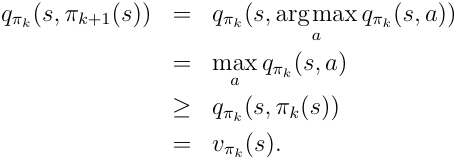

In [ ]:
display(img)

In [ ]:
md = md.replace('![](' + str(image_path) + ')', text)
print(md)

value function to approach optimality. 

To begin, let us consider a Monte Carlo version of classical policy iteration. In this method, we perform alternating complete steps of policy evaluation and policy improvement, beginning with an arbitrary policy _⇡_ 0 and ending with the optimal policy and optimal action-value function: 


![](/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf-0009-04.png)


where _−!_ E denotes a complete policy evaluation and _−!_ I denotes a complete policy improvement. Policy evaluation is done exactly as described in the preceding section. Many episodes are experienced, with the approximate actionvalue function approaching the true function asymptotically. For the moment, let us assume that we do indeed observe an infinite number of episodes and that, in addition, the episodes are generated with exploring starts. Under these assumptions, the Monte Carlo methods will compute each _q⇡k_ exactly, for arbitrary _⇡k_ . 

Policy improvement is do

## Ensuring we only run LaTeXOCR on equations

In [6]:
import clip
import torch

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
labels = ["a mathematical equation", "a diagram", "a table", "a chart", "a plot", "a graph", "a figure"]

image_input = preprocess(img).unsqueeze(0).to(device)
text_inputs = clip.tokenize(labels).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)
    similarity = (image_features @ text_features.T).softmax(dim=-1)

is_math = similarity[0][0] > 0.5 
print(is_math)

NameError: name 'img' is not defined

In [ ]:
md = pymupdf4llm.to_markdown(
    str(pdf_path),
    pages=[18],      
   # image_path="pdf_images",             
    write_images=True,            # actually write image files
    image_format="png",           # or "jpg"
    header=False,            
    footer=False,               
    use_ocr=True,                 # let layout/OCR help if needed
    show_progress=False,
)

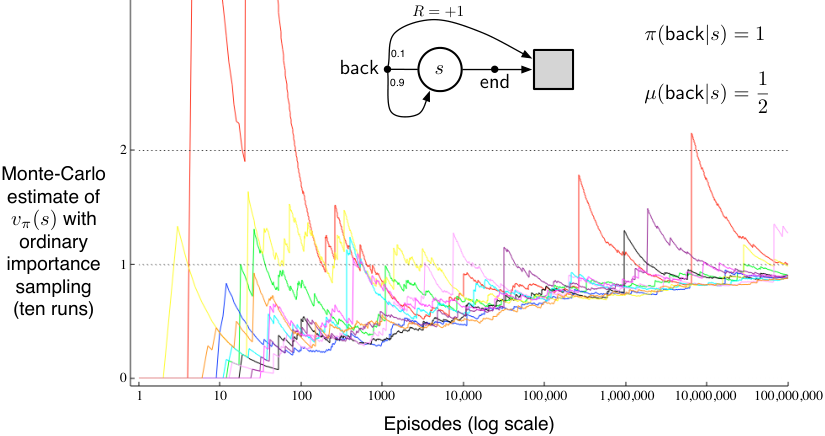

In [ ]:
image_path = Path("/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf-0019-01.png")
img = Image.open(image_path)
display(img)

In [ ]:
image_input = preprocess(img).unsqueeze(0).to(device)
text_inputs = clip.tokenize(labels).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)
    similarity = (image_features @ text_features.T).softmax(dim=-1)

is_math = similarity[0][0] > 0.5 
print(is_math)

tensor(False, device='cuda:0')


## Complete function to load PDFs

In [22]:
class DocumentLoader:
    def __init__(self):
        self.supported_extensions = ['.pdf']  # We'll add more later
        self.logger = logging.getLogger(__name__)
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.clipModel, self.preprocess = clip.load("ViT-B/32", device=self.device)
        self.labels = ["a mathematical equation", "a diagram", "a table", "a chart", "a plot", "a graph", "a figure"]
        self.OCRModel = LatexOCR()
    
    def load_directory(self, directory_path: str) -> List[Dict]:
        """Load all supported documents from a directory"""
        documents = []
        
        if not os.path.isdir(directory_path):
            self.logger.warning(f"Directory not found: {directory_path}")
            return documents
        
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            
            # Skip directories
            if os.path.isdir(file_path):
                continue
            
            # Check if file extension is supported
            ext = self._get_file_extension(filename)
            if ext not in self.supported_extensions:
                self.logger.debug(f"Skipping unsupported file: {filename}")
                continue
            
            # Load the file based on extension
            try:
                if ext == '.pdf':
                    content = self._load_pdf(str(file_path))
                    images = self.get_png_files(directory_path)

                    for image in images:
                        img = Image.open(image)
                        image_input = self.preprocess(img).unsqueeze(0).to(self.device)
                        text_inputs = clip.tokenize(self.labels).to(self.device)
                        

                        with torch.no_grad():
                            image_features = self.clipModel.encode_image(image_input)
                            text_features = self.clipModel.encode_text(text_inputs)
                            similarity = (image_features @ text_features.T).softmax(dim=-1)

                        is_math = similarity[0][0] > 0.5 
                        if is_math:
                            try:
                                equation = self.OCRModel(img)
                                content = content.replace('![](' + str(image) + ')', equation)
                            except ValueError as e:
                                print(f"OCR failed for {image}: {e}, skipping")
                                continue
                        else:
                            content = content.replace('![](' + str(image) + ')', '')

                    self.delete_png_files(directory_path)
                    if content:
                        print("Document appended")
                        documents.append({
                            'filename': filename,
                            'file_path': file_path,
                            'course': os.path.basename(os.path.normpath(directory_path)),
                            'extension': ext,
                            'content': content
                        })
                # Add more file type handlers here as needed
            except Exception as e:
                self.logger.error(f"Error loading file {filename}: {str(e)}")
                import traceback
                traceback.print_exc()
                continue
        
        return documents
    
    def _load_pdf(self, file_path: str) -> Optional[str]:
        """Extract text from a PDF file"""
        extraction = pymupdf4llm.to_markdown(
            file_path,                 
            write_images=True,            # actually write image files
            image_format="png",           
            header=False,            
            footer=False,               
            use_ocr=True,                 # let layout/OCR help if needed
            show_progress=False,
        )
        return extraction

    def get_png_files(self, directory_path: str) -> List[str]:
        """Get a list of all PNG files in a directory (non-recursive)"""
        png_files = []
        
        if not os.path.isdir(directory_path):
            return png_files
        
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            
            # Skip directories
            if os.path.isdir(file_path):
                continue
            
            # Check if file is a PNG
            if filename.lower().endswith('.png'):
                png_files.append(file_path)
        
        return png_files

    def delete_png_files(self, directory_path: str, recursive: bool = True):
        directory = Path(directory_path)
        
        if recursive:
            png_files = directory.rglob("*.png")
        else:
            png_files = directory.glob("*.png")
        
        for png_file in png_files:
            try:
                png_file.unlink()  # Delete the file
            except Exception as e:
                print(f"Error deleting {png_file}: {e}")
    
    def _get_file_extension(self, filename: str) -> str:
        """Helper to get lowercase file extension"""
        _, ext = os.path.splitext(filename)
        return ext.lower()

## Chunking Brainstorming

In [23]:
loader = DocumentLoader()
documents = loader.load_directory("/home/syedusmani/Documents/Projects/RAG_Assistant/data/ML_FOR_MUSIC/")
documents

=== Document parser messages ===
Full-page OCR on page.number=87/88.
Full-page OCR on page.number=87/88.
Full-page OCR on page.number=87/88.

Document appended


[{'filename': 'Module 1.pdf',
  'file_path': '/home/syedusmani/Documents/Projects/RAG_Assistant/data/ML_FOR_MUSIC/Module 1.pdf',
  'course': 'ML_FOR_MUSIC',
  'extension': '.pdf',
  'content': '**Machine Learning for Music** Introduction \n\n**(Brief) history of “algorithmic” music generation** \n\nMostly from “a brief history of algorithmic composition”:https://ccrma.stanford.edu/~blackrse/algorithm.html, which in turn is based on “techniques for algorithmic composition of music”: ~ http://alum.hampshire.edu/ adaF92/algocomp/algocomp95.html, among others \n\n**History of “algorithmic” music generation “Canonic” composition (~15th century)** _“The prevailing method was to write out a single voice part and to give instructions to the singers to derive the additional voices from it. The instruction or rule by which these further parts were derived was called a canon, which means \'rule\' or \'law.\' For example, the second voice might be instructed to sing the same melody starting a cert

In [24]:
print(documents[0]['content'])

**Machine Learning for Music** Introduction 

**(Brief) history of “algorithmic” music generation** 

Mostly from “a brief history of algorithmic composition”:https://ccrma.stanford.edu/~blackrse/algorithm.html, which in turn is based on “techniques for algorithmic composition of music”: ~ http://alum.hampshire.edu/ adaF92/algocomp/algocomp95.html, among others 

**History of “algorithmic” music generation “Canonic” composition (~15th century)** _“The prevailing method was to write out a single voice part and to give instructions to the singers to derive the additional voices from it. The instruction or rule by which these further parts were derived was called a canon, which means 'rule' or 'law.' For example, the second voice might be instructed to sing the same melody starting a certain number of beats or measures after the original; the second voice might be an inversion of the first or it might be a retrograde [etc.]" (Grout, 1996)_ 

**History of “algorithmic” music generation** 


In [25]:
from langchain_text_splitters import MarkdownHeaderTextSplitter, RecursiveCharacterTextSplitter

In [26]:
headers_to_split_on = [
    ("#", "Header 1")
]

# MD splits
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on, strip_headers=False
)
md_header_splits = markdown_splitter.split_text(documents[0]['content'])

# Char-level splits
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size = 250
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

# Split
splits = text_splitter.split_documents(md_header_splits)
splits

[Document(metadata={}, page_content='**Machine Learning for Music** Introduction  \n**(Brief) history of “algorithmic” music generation**'),
 Document(metadata={}, page_content='Mostly from “a brief history of algorithmic composition”:https://ccrma.stanford.edu/~blackrse/algorithm.html, which in turn is based on “techniques for algorithmic composition of music”: ~ http://alum.hampshire.edu/ adaF92/algocomp/algocomp95.html,'),
 Document(metadata={}, page_content='among others'),
 Document(metadata={}, page_content='**History of “algorithmic” music generation “Canonic” composition (~15th century)** _“The prevailing method was to write out a single voice part and to give instructions to the singers to derive the additional voices from it. The instruction or rule'),
 Document(metadata={}, page_content="it. The instruction or rule by which these further parts were derived was called a canon, which means 'rule' or 'law.' For example, the second voice might be instructed to sing the same melo

In [27]:
md_header_splits

[Document(metadata={}, page_content='**Machine Learning for Music** Introduction  \n**(Brief) history of “algorithmic” music generation**  \nMostly from “a brief history of algorithmic composition”:https://ccrma.stanford.edu/~blackrse/algorithm.html, which in turn is based on “techniques for algorithmic composition of music”: ~ http://alum.hampshire.edu/ adaF92/algocomp/algocomp95.html, among others  \n**History of “algorithmic” music generation “Canonic” composition (~15th century)** _“The prevailing method was to write out a single voice part and to give instructions to the singers to derive the additional voices from it. The instruction or rule by which these further parts were derived was called a canon, which means \'rule\' or \'law.\' For example, the second voice might be instructed to sing the same melody starting a certain number of beats or measures after the original; the second voice might be an inversion of the first or it might be a retrograde [etc.]" (Grout, 1996)_  \n**

In [28]:
from langchain_core.documents import Document

def convert_to_langDoc(documents):
    langDocs = []
    for doc in documents:
        chunks = markdown_splitter.split_text(doc['content'])
        for i, chunk in enumerate(chunks):
            langDocs.append(Document(page_content=chunk.page_content, metadata={'source': doc['file_path'], 'course': doc['course'], 'header': chunk.metadata.get("Header 1", ""), 'chunk_number': i}))
    return langDocs

langdocs = convert_to_langDoc(documents)
langdocs

[Document(metadata={'source': '/home/syedusmani/Documents/Projects/RAG_Assistant/data/ML_FOR_MUSIC/Module 1.pdf', 'course': 'ML_FOR_MUSIC', 'header': '', 'chunk_number': 0}, page_content='**Machine Learning for Music** Introduction  \n**(Brief) history of “algorithmic” music generation**  \nMostly from “a brief history of algorithmic composition”:https://ccrma.stanford.edu/~blackrse/algorithm.html, which in turn is based on “techniques for algorithmic composition of music”: ~ http://alum.hampshire.edu/ adaF92/algocomp/algocomp95.html, among others  \n**History of “algorithmic” music generation “Canonic” composition (~15th century)** _“The prevailing method was to write out a single voice part and to give instructions to the singers to derive the additional voices from it. The instruction or rule by which these further parts were derived was called a canon, which means \'rule\' or \'law.\' For example, the second voice might be instructed to sing the same melody starting a certain numbe

In [33]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma

embeddings = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

def embed_and_store(langdocs):
    vector_store = Chroma.from_documents(
        documents=langdocs,
        embedding=embeddings,
        persist_directory="../chroma_db"
    )
    return vector_store

embeddings = embed_and_store(langdocs)

print(str(embeddings)[:10] + "...")

<langchain...


In [34]:
print(embeddings._collection.count())

32
